In [51]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [52]:
def prot_div(left, right):
    if right == 0:
        return 0
    else:
        return left / right

def if_func(condition, state1, state2):
    if condition:
        return state1
    else:
        return state2

def read_experiment_results(full_path, iterations, epochs=100):
    dir_name = full_path
    results = []
    for it in range(iterations):
        with open(dir_name + 'iteration_' + str(it) + '.json') as json_file:
            if it % 10 == 0:
                print(it)
            data = json.load(json_file)
            results.append(data)
    print("Finished reading ", full_path)
    return results


In [53]:
results=[]
run_number = ['5']
path = "/Users/soren/Library/Mobile Documents/iCloud~md~obsidian/Documents/obsidian/results/autolr-2022-05-11/run_"
iterations = 33 
for i in run_number: 
    results.append(read_experiment_results(path + i + '/', iterations))


0
10
20
30
Finished reading  /Users/soren/Library/Mobile Documents/iCloud~md~obsidian/Documents/obsidian/results/autolr-2022-05-11/run_5/


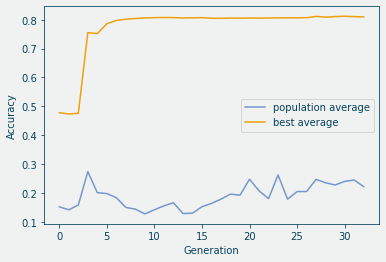

In [54]:
from phenotype_utils import readable_phenotype, smart_phenotype

def plot_fit(results):
    epochs = np.arange(len(results[0]))
    #print(epochs)
    averages_all = []
    bests_all = []
    stds_all = []
    best_of_all = []
    stds_best_all = [] 
    boa_fit = 0
    boa_indiv = None
    for iteration in epochs:
        averages_all.append([])
        bests_all.append([])
        stds_all.append([])
        best_of_all.append(0)
        stds_best_all.append(0)        
        for result in results:
            all_fits = []
            best = 0
            gen_best = 0
            for indiv in result[iteration]:
                if indiv['fitness'] < best:
                    best = indiv['fitness']
                    #plot_iter([indiv])
                    #print(indiv['other_info'].keys())
                    if indiv['fitness'] < boa_fit:
                        boa_fit = best
                        boa_indiv = indiv
                        phen = smart_phenotype(indiv["phenotype"])
                        phen = readable_phenotype(indiv["phenotype"])
                        #print(f'------NEW BEST------\n{iteration}-{boa_fit}\n{phen}\n--------------------')
                        #plot_iter([boa_indiv], len(indiv['other_info']['loss']), color='red', id_num=iteration)
                best = best if indiv['fitness'] > best else indiv['fitness']
                all_fits.append(indiv['fitness'])
            averages_all[iteration].append(np.average(all_fits))
            stds_all[iteration].append(np.std(all_fits))
            bests_all[iteration].append(best)
        stds_best_all[iteration] = np.std(bests_all[iteration]) * -1
        stds_all[iteration] = np.std(averages_all[iteration])
        averages_all[iteration] = np.average(averages_all[iteration]) * -1
        best_of_all[iteration] = np.min(bests_all[iteration])  * -1
        bests_all[iteration] = np.average(bests_all[iteration]) * -1
    plt.figure(facecolor='#eff2f1')
    ax = plt.axes()
    ax.set_facecolor(color="#eff2f1")
    ax.spines['bottom'].set_color('#08415c')
    ax.spines['top'].set_color('#08415c')
    ax.spines['left'].set_color('#08415c')
    ax.spines['right'].set_color('#08415c')
    ax.xaxis.label.set_color('#08415c')
    ax.yaxis.label.set_color('#08415c')
    ax.tick_params(axis='x', colors='#08415c')
    ax.tick_params(axis='y', colors="#08415c")
    plt.plot(epochs, averages_all, label='population average', color="#7796cb")
    plt.fill_between(epochs, [i + j for i, j in zip(averages_all, stds_all)], [i - j for i, j in zip(averages_all, stds_all)], alpha=0.2)
    plt.plot(epochs, bests_all, label='best average', color="#EFA00B")   
    plt.fill_between(epochs, [i + j for i, j in zip(bests_all, stds_best_all)], [i - j for i, j in zip(bests_all, stds_best_all)], alpha=0.2)
    #plt.plot(epochs, [0.7862666646639506 for i in bests_all], label='fixed lr val_acc')
    #plt.plot(epochs, best_of_all, label='best of all')
    plt.xlabel('Generation')
    plt.ylabel('Accuracy') 
    plt.legend(labelcolor='#08415c', facecolor="#eff2f1")
    plt.savefig('best_average_evolution1.png')

plot_fit(results)

In [55]:
smart_phenotype("alpha_func, beta_func, sigma_func, grad_func = lambda shape,  alpha, grad: tf.math.sqrt(tf.constant(9.38616893e-01, shape=shape, dtype=tf.float32)), lambda shape,  alpha, beta, grad: grad, lambda shape,  alpha, beta, sigma, grad: tf.math.subtract(sigma, tf.math.negative(grad)), lambda shape,  alpha, beta, sigma, grad: tf.math.multiply(tf.math.subtract(tf.math.negative(sigma), beta), tf.math.sqrt(tf.constant(7.03711536e-03, shape=shape, dtype=tf.float32)))")

'tf.math.multiply(tf.math.subtract(tf.math.negative(tf.math.subtract(sigma, tf.math.negative(grad))), grad), tf.math.sqrt(tf.constant(7.03711536e-03, shape=shape, dtype=tf.float32)))'